In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import os

In [ ]:
patient_data=pd.read_csv('/content/drive/My Drive/archive/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])

In [ ]:
patient_data.columns = ["Patient_ID", "Disease"]
patient_data.head()

,Patient_ID,Disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [ ]:
path='/content/drive/My Drive/archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files[:5]

['160_1b4_Lr_mc_AKGC417L',
 '160_1b3_Tc_mc_AKGC417L',
 '160_1b3_Pl_mc_AKGC417L',
 '160_1b4_Pl_mc_AKGC417L',
 '160_1b3_Lr_mc_AKGC417L']

In [ ]:
def getFilenameInfo(file):
    return file.split('_')

In [ ]:
files_data=[]
for file in files:
    data=pd.read_csv(path + file + '.txt',sep='\t',names=['Start_time', 'End_Time', 'Crackles', 'Wheezing'])
    name_data=getFilenameInfo(file)
    data['Patient_ID']=name_data[0]
    data['Mode']=name_data[-2]
    data['File_Name']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df.head()

,Start_time,End_Time,Crackles,Wheezing,Patient_ID,Mode,File_Name
0,1.962,6.553,0,1,160,mc,160_1b4_Lr_mc_AKGC417L
1,6.553,11.160,0,1,160,mc,160_1b4_Lr_mc_AKGC417L
2,11.160,15.401,0,1,160,mc,160_1b4_Lr_mc_AKGC417L
3,15.401,19.841,0,1,160,mc,160_1b4_Lr_mc_AKGC417L
0,1.862,5.718,0,0,160,mc,160_1b3_Tc_mc_AKGC417L


In [ ]:
files_df.drop('Crackles', axis = 1)

,Start_time,End_Time,Wheezing,Patient_ID,Mode,File_Name
0,1.962,6.553,1,160,mc,160_1b4_Lr_mc_AKGC417L
1,6.553,11.160,1,160,mc,160_1b4_Lr_mc_AKGC417L
2,11.160,15.401,1,160,mc,160_1b4_Lr_mc_AKGC417L
3,15.401,19.841,1,160,mc,160_1b4_Lr_mc_AKGC417L
0,1.862,5.718,0,160,mc,160_1b3_Tc_mc_AKGC417L
...,...,...,...,...,...,...
3,15.401,19.841,0,160,mc,160_1b4_Pr_mc_AKGC417L
0,1.962,6.553,1,160,mc,160_1b4_Ar_mc_AKGC417L
1,6.553,11.160,1,160,mc,160_1b4_Ar_mc_AKGC417L
2,11.160,15.401,1,160,mc,160_1b4_Ar_mc_AKGC417L


In [ ]:
patient_data.Patient_ID=patient_data.Patient_ID.astype('int32')
files_df.Patient_ID=files_df.Patient_ID.astype('int32')

In [ ]:
data=pd.merge(files_df,patient_data,on='Patient_ID')
data.head()

,Start_time,End_Time,Crackles,Wheezing,Patient_ID,Mode,File_Name,Disease
0,1.962,6.553,0,1,160,mc,160_1b4_Lr_mc_AKGC417L,COPD
1,6.553,11.160,0,1,160,mc,160_1b4_Lr_mc_AKGC417L,COPD
2,11.160,15.401,0,1,160,mc,160_1b4_Lr_mc_AKGC417L,COPD
3,15.401,19.841,0,1,160,mc,160_1b4_Lr_mc_AKGC417L,COPD
4,1.862,5.718,0,0,160,mc,160_1b3_Tc_mc_AKGC417L,COPD


In [ ]:
data = data.drop('Crackles', axis = 1)

In [ ]:
data = data.drop('Disease', axis = 1)

In [ ]:
os.makedirs('/content/drive/My Drive/Lung_Project/csv_data')

In [ ]:
def getPureSample(raw_data,start,end,sr=22050):
    '''
    Takes a numpy array and spilts its using start and end args
    
    raw_data=numpy array of audio sample
    start=time
    end=time
    sr=sampling_rate
    
    '''
    max_ind = len(raw_data) 
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

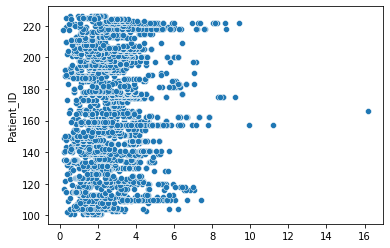

In [ ]:
sns.scatterplot(x=(data.End_Time-data.Start_time), y=data.Patient_ID)

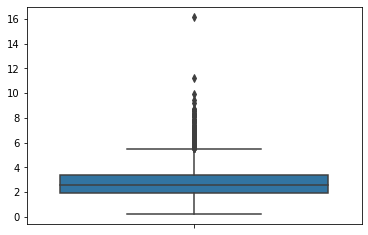

In [ ]:
sns.boxplot(y=(data.End_Time-data.Start_time))

In [ ]:
os.makedirs('/content/drive/My Drive/Lung_Project/processed_audio_files')

In [ ]:
data['Audio_Name'] = "TBD"

In [ ]:
data = data.reset_index()
del data['index']

In [ ]:
data

,Start_time,End_Time,Wheezing,Patient_ID,Mode,File_Name,Audio_Name
0,1.962,6.553,1,160,mc,160_1b4_Lr_mc_AKGC417L,TBD
1,6.553,11.160,1,160,mc,160_1b4_Lr_mc_AKGC417L,TBD
2,11.160,15.401,1,160,mc,160_1b4_Lr_mc_AKGC417L,TBD
3,15.401,19.841,1,160,mc,160_1b4_Lr_mc_AKGC417L,TBD
4,1.862,5.718,0,160,mc,160_1b3_Tc_mc_AKGC417L,TBD
...,...,...,...,...,...,...,...
6893,12.007,13.707,0,159,sc,159_1b1_Ll_sc_Meditron,TBD
6894,13.707,15.550,0,159,sc,159_1b1_Ll_sc_Meditron,TBD
6895,15.550,17.336,0,159,sc,159_1b1_Ll_sc_Meditron,TBD
6896,17.336,18.841,0,159,sc,159_1b1_Ll_sc_Meditron,TBD


In [ ]:
positive_wheezing = 0
negative_wheezing = 0
for index, row in data.iterrows():
  if row["Wheezing"] == 1:
    positive_wheezing = positive_wheezing + 1
  else:
    negative_wheezing = negative_wheezing + 1

In [ ]:
positive_wheezing

1392

In [ ]:
negative_wheezing

5506

In [ ]:
for index,row in data.iterrows():
    print("Index ->",index)
    print("Data->\n",row)
    break

Index -> 0
Data->
 Start_time                     1.018
End_Time                       3.411
Wheezing                           0
Patient_ID                       107
Mode                              mc
File_Name     107_2b4_Pr_mc_AKGC417L
Audio_Name                       TBD
Name: 0, dtype: object


In [ ]:
import librosa as lb
import soundfile as sf
i,c=0,0
for index,row in data.iterrows():
    maxLen=6
    start=row['Start_time']
    end=row['End_Time']
    filename=row['File_Name']
    
    #If len > maxLen , change it to maxLen
    if end-start>maxLen:
        end=start+maxLen
    
    audio_file_loc=path + filename + '.wav'
    
    if index > 0:
        #check if more cycles exits for same patient if so then add i to change filename
        if data.iloc[index-1]['File_Name']==filename:
            i+=1
        else:
            i=0
    filename= filename + '_' + str(i) + '.wav'
    data.at[index, 'Audio_Name'] = filename
    
    save_path='/content/drive/My Drive/Lung_Project/processed_audio_files/' + filename
    c+=1
    
    audioArr,sampleRate=lb.load(audio_file_loc)
    pureSample=getPureSample(audioArr,start,end,sampleRate)
    
    #pad audio if pureSample len < max_len
    reqLen=6*sampleRate
    padded_data = lb.util.pad_center(pureSample, reqLen)
    
    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total Files Processed: ',c)

Total Files Processed:  6898


In [ ]:
data

,Start_time,End_Time,Wheezing,Patient_ID,Mode,File_Name,Audio_Name
0,1.018,3.411,0,107,mc,107_2b4_Pr_mc_AKGC417L,107_2b4_Pr_mc_AKGC417L_0.wav
1,3.411,5.827,0,107,mc,107_2b4_Pr_mc_AKGC417L,107_2b4_Pr_mc_AKGC417L_1.wav
2,5.827,8.339,0,107,mc,107_2b4_Pr_mc_AKGC417L,107_2b4_Pr_mc_AKGC417L_2.wav
3,8.339,10.923,0,107,mc,107_2b4_Pr_mc_AKGC417L,107_2b4_Pr_mc_AKGC417L_3.wav
4,10.923,13.292,0,107,mc,107_2b4_Pr_mc_AKGC417L,107_2b4_Pr_mc_AKGC417L_4.wav
...,...,...,...,...,...,...,...
6893,13.521,15.350,0,225,sc,225_1b1_Pl_sc_Meditron,225_1b1_Pl_sc_Meditron_9.wav
6894,15.350,16.850,0,225,sc,225_1b1_Pl_sc_Meditron,225_1b1_Pl_sc_Meditron_10.wav
6895,16.850,18.436,0,225,sc,225_1b1_Pl_sc_Meditron,225_1b1_Pl_sc_Meditron_11.wav
6896,18.436,19.650,0,225,sc,225_1b1_Pl_sc_Meditron,225_1b1_Pl_sc_Meditron_12.wav


In [ ]:
data.to_csv('/content/drive/My Drive/Lung_Project/csv_data/data.csv',index=False)